In [81]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import matplotlib.pyplot as plt
from plot_keras_history import show_history, plot_history
from tensorflow.keras import Sequential, layers
import os
import zipfile
from tensorflow.keras.optimizers import Adam

In [82]:
# def unzip_data(filename, dir_path):
#     with zipfile.ZipFile(filename, "r") as file:
#         file.extractall(dir_path)

In [83]:
# unzip_data("titanic.zip", "titanic")

## Checking the train and test data

In [84]:
train_df = pd.read_csv("titanic/train.csv")
test_df = pd.read_csv("titanic/test.csv")
gender_submission_df = pd.read_csv("titanic/gender_submission.csv")

In [85]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [86]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [87]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [88]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [89]:
mean_value=train_df['Age'].mean()

train_df['Age'].fillna(value=mean_value, inplace=True)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [90]:
# Minmaxscaler
train_df.Age.value_counts()

29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: Age, Length: 89, dtype: int64

In [91]:
# Minmaxscaler
train_df.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [92]:
# Factorize
train_df.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [93]:
# One hot encoded
train_df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

## Start preprocessing the data

In [94]:
# train_df = train_df.dropna()

In [95]:
train_df["Cabin"] = train_df["Cabin"].fillna(0)
train_df = train_df.dropna()
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


In [96]:
cols = ["Cabin", "Ticket"]

for col in cols:
    train_df[col] = pd.factorize(train_df[col])[0].astype(float)
    train_df.head()

Notes:

*  Dropping "Name" column
*   MinMaxScaler = ["PassengerId", "Pclass", "Age", "SibSp", "Parch", "Fare"]
*   Replace "Cabin" NAn-s with 0.0 and Factorize = ["Ticket","Cabin",]
*   Onehotencoding = ["Sex", "Embarked"]


In [97]:
train_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [98]:
# Creating a transformer to standardize all the data in the dataframe
transformer = make_column_transformer(
    (MinMaxScaler(), ["PassengerId", "Pclass", "Age", "SibSp", "Parch", "Fare", "Ticket", "Cabin"]),
                                      (OneHotEncoder(handle_unknown="ignore"),["Sex", "Embarked"]))

In [99]:
# Making training and test set from training data

x = train_df.drop(["Name", "Survived"], axis=1)
y = train_df["Survived"]


In [100]:
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,male,22.000000,1,0,0.0,7.2500,0.0,S
1,2,1,female,38.000000,1,0,1.0,71.2833,1.0,C
2,3,3,female,26.000000,0,0,2.0,7.9250,0.0,S
3,4,1,female,35.000000,1,0,3.0,53.1000,2.0,S
4,5,3,male,35.000000,0,0,4.0,8.0500,0.0,S
...,...,...,...,...,...,...,...,...,...,...
886,887,2,male,27.000000,0,0,676.0,13.0000,0.0,S
887,888,1,female,19.000000,0,0,677.0,30.0000,145.0,S
888,889,3,female,29.699118,1,2,613.0,23.4500,0.0,S
889,890,1,male,26.000000,0,0,678.0,30.0000,146.0,C


In [101]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

transformer.fit(x_train)

# Transform training and test data with normalization (MinMaxScaler, OneHotEncoder)

x_train_tr = transformer.transform(x_train)
x_test_tr = transformer.transform(x_test)

len(x_train_tr), len(y_train), len(x_test_tr), len(y_test)

(711, 711, 178, 178)

In [102]:
x_train_tr.shape, y_train.shape 

((711, 13), (711,))

In [103]:
x_train_tr[:2]

array([[0.79550562, 0.        , 0.27117366, 0.        , 0.        ,
        0.2958059 , 0.39027982, 0.        , 1.        , 0.        ,
        0.        , 0.        , 1.        ],
       [0.26966292, 1.        , 0.36792055, 0.125     , 0.        ,
        0.02821272, 0.15758468, 0.        , 1.        , 0.        ,
        1.        , 0.        , 0.        ]])

In [104]:
np.isnan(x_train_tr).sum()

0

In [105]:
def modelcheckpoint(model, filepath="titanic_models/"):
    model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(filepath ,model), monitor='val_accuracy',verbose=0,save_best_only= True)
    return model_checkpoint

## Building Models

In [106]:
# Creating the first model

tf.random.set_seed(42)

model = Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
],name="model_dense")

model.compile(loss="mae",
              optimizer=Adam(learning_rate=0.001),
              metrics=["accuracy"])

history = model.fit(x_train_tr,y_train,
                    epochs = 50,
                    verbose=0,
                    validation_data=(x_test_tr,y_test),
                    callbacks=[modelcheckpoint(model.name)])

INFO:tensorflow:Assets written to: titanic_models\model_dense\assets
INFO:tensorflow:Assets written to: titanic_models\model_dense\assets
INFO:tensorflow:Assets written to: titanic_models\model_dense\assets
INFO:tensorflow:Assets written to: titanic_models\model_dense\assets
INFO:tensorflow:Assets written to: titanic_models\model_dense\assets


In [107]:
model.evaluate(x_test_tr, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.2103 - accuracy: 0.7865


[0.21030014753341675, 0.7865168452262878]

(<Figure size 1000x500 with 2 Axes>,
 array([<AxesSubplot: title={'center': 'Loss'}, xlabel='Epochs', ylabel='Loss'>,
        <AxesSubplot: title={'center': 'Accuracy'}, xlabel='Epochs', ylabel='Accuracy'>],
       dtype=object))

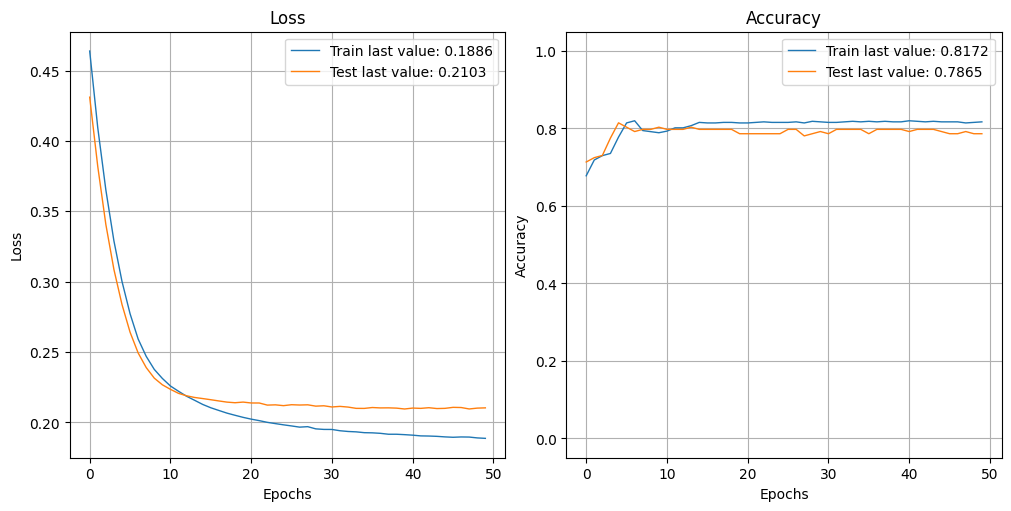

In [108]:
plot_history(history)

In [109]:
#Load best model to make predictions
from sklearn.metrics import accuracy_score, f1_score, recall_score

model_best = tf.keras.models.load_model("titanic_models/model_dense/")
model_preds = model_best.predict(x_test_tr)
model_preds 

6/6 [==============================] - 0s 1ms/step


array([[0.05917251],
       [0.80168355],
       [0.62227046],
       [0.07218846],
       [0.83973444],
       [0.0498565 ],
       [0.07491924],
       [0.05149487],
       [0.9318697 ],
       [0.8671911 ],
       [0.08525237],
       [0.4070902 ],
       [0.04401261],
       [0.15175022],
       [0.04954192],
       [0.05205745],
       [0.44433624],
       [0.13624433],
       [0.18814525],
       [0.04922998],
       [0.34325624],
       [0.7135156 ],
       [0.05273213],
       [0.27967587],
       [0.0501394 ],
       [0.26697287],
       [0.25328186],
       [0.6516405 ],
       [0.12122495],
       [0.07272954],
       [0.1333974 ],
       [0.525459  ],
       [0.06628947],
       [0.4546062 ],
       [0.0421886 ],
       [0.12155671],
       [0.64108074],
       [0.6218316 ],
       [0.13619708],
       [0.06485189],
       [0.06860933],
       [0.43257496],
       [0.07411809],
       [0.05009978],
       [0.11739638],
       [0.32117042],
       [0.5292824 ],
       [0.063

In [110]:
model_pred = tf.squeeze(tf.round(model_preds))
model_pred

<tf.Tensor: shape=(178,), dtype=float32, numpy=
array([0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
       1., 1., 1., 0., 0., 0., 0., 0.], dtype=float32)>

In [111]:
model_result = accuracy_score(y_true=y_test,
                              y_pred=model_pred)
model_result

0.8146067415730337

In [112]:
# Creating an XGBOOST model

import xgboost as xgb
from xgboost import XGBClassifier


In [113]:

name= "model1_xgboost"
path = "titanic_models"
xg_callb = xgb.callback.TrainingCheckPoint(directory=path,iterations=15)
model1 = XGBClassifier(scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=4, 
                      gamma=10)

xg_train = xgb.DMatrix(x_train_tr, y_train)
xg_test = xgb.DMatrix(x_test_tr,y_test)
eval_metric = ["auc", "error"]
eval_set = [(xg_train, "Train"), (xg_test, "Test")]
evals_res = {}

params = {"learning_rate": 0.01,
          "max_depth": 12,
          "eval_metric" : eval_metric}
best = xgb.train(params= params, dtrain=xg_train,
        evals=eval_set, num_boost_round=100,early_stopping_rounds=20, 
        evals_result = evals_res,)

[0]	Train-auc:0.96331	Train-error:0.04360	Test-auc:0.79218	Test-error:0.20225
[1]	Train-auc:0.96564	Train-error:0.04360	Test-auc:0.79258	Test-error:0.20225
[2]	Train-auc:0.96562	Train-error:0.04079	Test-auc:0.79258	Test-error:0.20787
[3]	Train-auc:0.96564	Train-error:0.04079	Test-auc:0.79258	Test-error:0.20787
[4]	Train-auc:0.96562	Train-error:0.04079	Test-auc:0.79258	Test-error:0.20225
[5]	Train-auc:0.96564	Train-error:0.04079	Test-auc:0.79258	Test-error:0.20787
[6]	Train-auc:0.96911	Train-error:0.04079	Test-auc:0.79551	Test-error:0.20787
[7]	Train-auc:0.97030	Train-error:0.04079	Test-auc:0.79684	Test-error:0.20787
[8]	Train-auc:0.97131	Train-error:0.04079	Test-auc:0.79949	Test-error:0.20225
[9]	Train-auc:0.97147	Train-error:0.04079	Test-auc:0.80003	Test-error:0.20225
[10]	Train-auc:0.97243	Train-error:0.04079	Test-auc:0.79797	Test-error:0.20225
[11]	Train-auc:0.97212	Train-error:0.04079	Test-auc:0.79943	Test-error:0.20225
[12]	Train-auc:0.97265	Train-error:0.04079	Test-auc:0.79836	Te

In [114]:
history1 = model1.fit(x_train_tr, y_train)
print(model1)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=10, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=4, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)


In [115]:
model1_pred = model1.predict(x_test_tr)
model1_preds = tf.squeeze(tf.round(model_pred))

In [116]:
model1_result = accuracy_score(y_test, model1_preds)
model1_result

0.8146067415730337

In [117]:
gender_submission_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [118]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [119]:
test_df["Cabin"].isna().sum()


327

In [120]:
test_df['Fare'] = test_df['Fare'].fillna(0)
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [121]:
test_df["Cabin"].isna().sum()
test_df["Cabin"] = test_df["Cabin"].fillna(0)
new_test = test_df.drop("Name", axis=1)


In [122]:
columns = ["Cabin", "Ticket"]

for col in  columns:

    new_test[col] = pd.factorize(new_test[col])[0].astype(float)
new_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,male,34.5,0,0,0.0,7.8292,0.0,Q
1,893,3,female,47.0,1,0,1.0,7.0000,0.0,S
2,894,2,male,62.0,0,0,2.0,9.6875,0.0,Q
3,895,3,male,27.0,0,0,3.0,8.6625,0.0,S
4,896,3,female,22.0,1,1,4.0,12.2875,0.0,S


In [123]:
new_test.Embarked.value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [124]:
new_test.isna().sum()



PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin           0
Embarked        0
dtype: int64

In [125]:
mean_value=new_test['Age'].mean()

new_test['Age'].fillna(value=mean_value, inplace=True)

In [126]:
transformer.fit(new_test)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['PassengerId', 'Pclass', 'Age', 'SibSp',
                                  'Parch', 'Fare', 'Ticket', 'Cabin']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['Sex', 'Embarked'])])

In [127]:
test = transformer.transform(new_test)

In [128]:
test_y = np.array(gender_submission_df["Survived"])
test_y

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [129]:
test[:2]

array([[0.        , 1.        , 0.4527232 , 0.        , 0.        ,
        0.01528158, 0.        , 0.        , 0.        , 1.        ,
        0.        , 1.        , 0.        ],
       [0.00239808, 1.        , 0.61756561, 0.125     , 0.        ,
        0.01366309, 0.00276243, 0.        , 1.        , 0.        ,
        0.        , 0.        , 1.        ]])

In [130]:
test.shape, test_y.shape, test[1].shape

((418, 13), (418,), (13,))

In [131]:
model1_pred = model1.predict(test)
model1_final_pred = tf.squeeze(tf.round(model1_pred))


In [132]:
model_pred = model.predict(test)
model_final_pred = tf.squeeze(tf.round(model_pred))

14/14 [==============================] - 0s 1ms/step


In [135]:
result = accuracy_score(y_true=test_y,
                        y_pred=model_final_pred)
result

0.9593301435406698

In [136]:
result1 = accuracy_score(y_true=test_y,
                         y_pred=model1_final_pred)
result1

0.9545454545454546

In [137]:
prediction = pd.DataFrame({"Name": test_df["Name"],
                           "Survived": model_final_pred})
prediction["Survived"] = prediction["Survived"].replace({0: False, 1: True})
prediction

,Name,Survived
0,"Kelly, Mr. James",False
1,"Wilkes, Mrs. James (Ellen Needs)",False
2,"Myles, Mr. Thomas Francis",False
3,"Wirz, Mr. Albert",False
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",False
...,...,...
413,"Spector, Mr. Woolf",False
414,"Oliva y Ocana, Dona. Fermina",True
415,"Saether, Mr. Simon Sivertsen",False
416,"Ware, Mr. Frederick",False
